MODELI GEOMETRIJE
=========

### UVOD


## 1.EUKLIDSKA RAVNINA

Neka su $x,y \in \mathbb{R}^2,x=(x_1,x_2),y=(y_1,y_2).$<br>

1. **SKALARNI PRODUKT**   $\langle x,y\rangle =x_1y_1+x_2y_2$    
2. **NORMA**   $|| x ||=\sqrt{\langle x,x\rangle}$    
3. **METRIKA** P,Q točke   $\Rightarrow d(P,Q)=||Q-P||$    
4. **METRIČKI PROSTOR**   $(\mathbb{R}^2,d)$     $\longrightarrow$   **EUKLIDSKA RAVNINA** ($E^2$)


**DEF**: Neka je $P \in E^2$,neka je $v\in \mathbb{R}^2$  t.d $v\neq(0,0)$.
Definiramo skup $p:=${$T \in E^2 : T-P \in [v]$}. To je pravac kroz točku P smjera [v].

$T \in P \iff T-p \in [v] \iff T \in P+[v] \iff p = P+ [v]$  **LINEARNA MNOGOSTRUKOST**

**PROP**:Neka su $P,Q \in E^2$ različite točke. Tada $\exists!$ pravac koji sadrži te dvije točke.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
class Point:
    def __init__(self,x,y):
            self.x=x
            self.y = y
    def translate(self,dx):
        self.x+=dx
        self.y+=dy
    def __str__(self):
        return("Point at [{0},{1}]").format(self.x,self.y)
    def __add__(self, p):
        return Point(self.x+p.x, self.y+p.y)
    def __sub__(self,p):
        return Point(self.x-p.x, self.y-p.y)
    def __mul__( self, scalar ):
        return Point(self.x*scalar, self.y*scalar)
    def rotate(self, rad):
        s, c = [f(rad) for f in (math.sin, math.cos)]
        x, y = (c*self.x - s*self.y, s*self.x + c*self.y)
        return Point(x,y)
    def slide(self, p):
        self.x = self.x + p.x
        self.y = self.y + p.y
    def rotate_about(self, p, theta):
        result = self.clone()
        result.slide(-p.x, -p.y)
        result.rotate(theta)
        result.slide(p.x, p.y)
        return result
    def plot_point(self):
        plt.plot(self.x,self.y,'or')
    def connectpoints(self, T, *args, **kwargs):
        self.plot_point()
        T.plot_point()
        if len(args)==0 and len(kwargs)==0:
            args=('-')
        plt.plot([self.x,T.x],[self.y,T.y],*args,**kwargs)
        plt.title('pravac kroz dvije točke')
    def crossprod(self,T):
        return self.x*T.x+self.y*T.y
    def mirror(self,P,n):
        N=np.sqrt(n.crossprod(n))
        n=Point(n.x/N,n.y/N)
        return self-n*2*(self-P).crossprod(n)
        

def random_point ():
    P=np.random.choice(100,2)
    return Point(P[0],P[1])

In [2]:
P=Point(2,2)
print(P)

Point at [2,2]


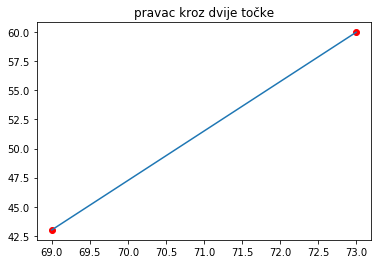

In [3]:
import numpy as np
P= random_point()
Q= random_point()
P.connectpoints(Q)
plt.show()

**DEF:** Pravci su kompunktalni ako svi prolaze kroz istu točku.

Text(0.5,1,'Kompunktalni pravci')

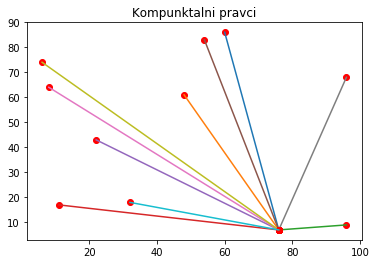

In [4]:
#Prikaz kompunktalnih pravaca kroz proizvoljnu točku K.
K=random_point()
O=Point(0,0)
L=[]
for i in range(10):
    L.append(random_point())
    K.connectpoints(L[i])
plt.title('Kompunktalni pravci')


**DEF:** Zrcaljenje (sminetrija) s obzirom na pravac p je preslikavanje  $\zeta_p:E^2\to E^2$ zadano s $\zeta_px=x-2\langle x-P,n\rangle n$, gdje je pravac zadan točkom P i normalom n.

Primjer:
Neka je p pravac kroz točku P=(2,2) s normalom (1,1).Neka je Q=(3,3) neka točka. Određujemo simetričnu točku od Q s obzirom na pravac p.

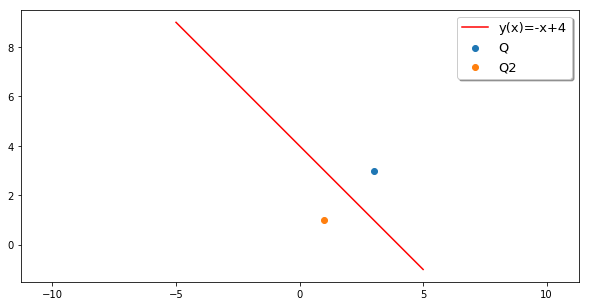

In [5]:
P=Point(2,2)
Q=Point(3,3)
n=Point(1,1)
def line(a, b):
    def y(x):
        return a*x+b
    return y
def line1(P,n):
    return line(-n.x/n.y,P.y+n.x/n.y*P.x)
Q2=Q.mirror(P,n)
y=line1(P,n)
x=np.linspace(-5,5)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(x, y(x),color='red',label='y(x)=-x+4' )
ax.scatter(Q.x,Q.y,label='Q')
ax.scatter(Q2.x,Q2.y,label='Q2')
ax.legend(loc='best',fontsize=13,shadow=True)
plt.axis('equal')
plt.show()


Primjer: Neka je K1 random točka.Neka je $y=2x+1$ pravac. Odredimo refletiranu točku od K1.

<function matplotlib.pyplot.show>

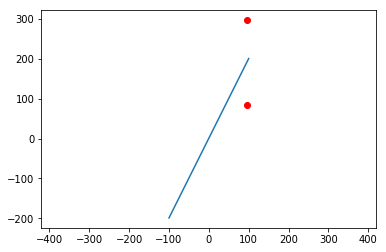

In [6]:
K1=random_point()
a=2
b=1
y1=line(2,1)
V=Point(K1.x,K1.y-b)
L=Point(1,a)
K2 = L*(2*(V.x)/(L.x))-V
K1.plot_point()
x1=np.linspace(-100,100)
plt.plot(x1,y1(x1))
plt.axis('equal')
K2.plot_point()
plt.show

**DEF:** **Izometrija** je preslikavanje koje čuva udaljenost $f:E^2\to E^2 $  t.d  $ d(f(x),f(y))=d(x,y)$.

Spomenuta simetrija je jedan primjer izometrije.Ako neko proizvoljno  preslikavanje $f:E^2\to E^2 $ napišemo u matričnom obliku t.d $f(x)=Ax+b$,onda je ono izometrija $\iff$ je A ortogonalna matrica.

In [7]:
def Ortogonalna(A):
    for i in range(len(A[0,:])):
        if np.linalg.norm(A[:,i]) != 1:
            return False
    return True
A=np.array([[0,1],[1,0]])
Ortogonalna(A)

True

**DEF:** Neka je a pravac te p,q okomiti pravci. Kompozicija $\zeta_p\zeta_q$ je **TRANSLACIJA DUŽ  PRAVCA a**.
$\tau x=x+v $, za neki vektor v je translacija.<br>
$D:$<br>
$p=P+[n],q=Q+[n]$, gdje $[n]$ označava smjer pravca, a P i Q točke kroz kojim pravci prolaze.<br>
$\zeta_p\zeta_q x = \zeta_q x-2 {\langle \zeta_q x-P,n\rangle}n = x-2{\langle x-Q,n\rangle}n-2{\langle x-P,n\rangle}n+n{\langle x-Q,n\rangle}{\langle n,n\rangle}n = x-2{\langle x-Q,n\rangle}n-2{\langle x-P,n\rangle}n+n{\langle x-Q,n\rangle}n = x +2{\langle P-Q,n\rangle}n=x+2(P-Q){\langle 1,n\rangle}=x+2(P-Q)$<br>
<br>
Pokažimo da je takva translacija izometrija.


In [8]:
import sympy
import IPython as ip
sympy.init_printing()
x=sympy.Symbol('x')
y=sympy.Symbol('y')
v=sympy.Symbol('v')
norm1=sympy.Symbol('||x-y||')
norm2=sympy.Symbol('||f(x)-f(y)||')
udaljenost =sympy.Symbol('d(x,y)')
def translacija (v):
    def f (x):
        return x + v
    return f
f=translacija(v)
solve=sympy.cancel(f(x)-f(y))
sympy.Eq(udaljenost,norm1), sympy.Eq(norm2,norm1)
#sympy.Eq(x-y,f(x)-(y))
#sympy.init_printing(use_latex='mathjax')
#display(ip.display.Latex("||x-y||="))
#x-y
#display(ip.display.Latex("||f(x)-f(y)||=||(x+v)-(y+v)||"),sympy.cancel(f(x)-f(y)))

Jer je udaljenost d(x,y) definira preko norme razlike x-y,očito je translacija izometrija.<br>
Neka su p i q t.d $p|| q$.Neka je a pravac t.d $ a \bot p,q$. 
Neka su P i Q sjecišta redom pravca p sa a i q sa a. 
Gornji dokaz pokazuje da je kompozicija 2 zrcaljenja s obzirom na pravce p i q duž a: $\tau x=x+2(P-Q)$ <br>
<br>
Prikažimo paralelne pravce $p=2x+1$,  $q=2x-1$, njima okomit pravac. Translatirajmo točku$ P=(0,1)$ duž a.

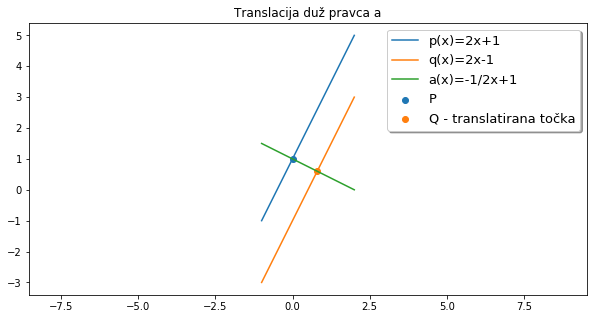

In [9]:
from fractions import Fraction as frac
x=np.linspace(-1,2)
p=line(2,1)
q=line(2,-1)
a=line(-1/2,1)
P=Point(0,1)
Q=Point(frac(4,5),frac(3,5))
#plt.plot(x,p(x))
#plt.plot(x,q(x))
#plt.plot(x,a(x))
#plt.axis('equal')
#P.plot_point()
#Q.plot_point()
#plt.show()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(x, p(x),label='p(x)=2x+1')
plt.plot(x, q(x),label='q(x)=2x-1')
plt.plot(x, a(x),label='a(x)=-1/2x+1')
ax.scatter(P.x,P.y,label='P')
ax.scatter(Q.x,Q.y,label='Q - translatirana točka')
ax.legend(loc='best',fontsize=13,shadow=True)
plt.axis('equal')
plt.title('Translacija duž pravca a')
plt.show()


**PROP:** Translacija je bijekcija,ima inverz koji je također translacija. Vrijedi $\tau_\lambda \tau_\mu=\tau_{\lambda+\mu} $ za neke vektore $\lambda, \mu $.<br>
Putem sympy.Eq() lako mozemo provjeriti jesu li igrazi jednaki,koristimo gore definiranu funkciju.


In [10]:
x=sympy.Symbol('x')
l=sympy.Symbol(r"\lambda")
m=sympy.Symbol(r"\mu")

tl=translacija(l)
tm=translacija(m)
tlm=translacija(l+m)
display(tlm(x))
display(tl(tm(x)))
sympy.Eq(tlm(x),tl(tm(x)))

**DEF:** Neka je $P \in E^2$ te $a,b \in P$ pravci kroz točku P. Preslikavanje $\zeta_a\zeta_b$ zovemo **ROTACIJA** oko točke P. Ako je a=b, onda je ta rotacija identiteta.<br>

In [11]:
def mirror(Q, n):
    def f(P):
        return P.mirror(Q, n)
    return f

def sym_S(phi):
    return sympy.Matrix([[sympy.cos(2*phi),sympy.sin(2*phi)],[sympy.sin(2*phi),-sympy.cos(2*phi)]])
def sym_R(phi):
    return sympy.Matrix([[sympy.cos(phi),-sympy.sin(phi)],[sympy.sin(phi),sympy.cos(phi)]])

display(sym_S(sympy.Symbol(r"\alpha")))
display(sym_R(sympy.Symbol(r"\beta")))

⎡cos(2⋅\alpha)  sin(2⋅\alpha) ⎤
⎢                             ⎥
⎣sin(2⋅\alpha)  -cos(2⋅\alpha)⎦

⎡cos(\beta)  -sin(\beta)⎤
⎢                       ⎥
⎣sin(\beta)  cos(\beta) ⎦

Prva prikazana matrica je  $S_\alpha$  matrica zrcaljenja za $\alpha$ s obzirom na pravac kroz ishodište.<br>
Druga prikazana matrica je  $R_\beta$  matrica rotacije za kut $\beta$ oko ishodišta <br>

In [12]:
def S(phi):
    return np.array([[np.cos(2*phi),np.sin(2*phi)],[np.sin(2*phi),-np.cos(2*phi)]])
def R(phi):
    return np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])

Prikazat cemo u *data frama-u* sve  kompozicije matrica oblika $S_\alpha$ i $R_\beta$.

In [13]:
from pandas import DataFrame as df
d={"S(a)":["S(a-c/2)","R(2(b-a))"],"R(d)":["R(c+d)","S(b-d/2)"]}
d1=df(d,index=["R(c)","S(b)"])
d1

,R(d),S(a)
R(c),R(c+d),S(a-c/2)
S(b),S(b-d/2),R(2(b-a))


- S($\alpha$) = $S_\alpha$
- R($\beta$) = $R_\beta$ 
gdje su $S_\alpha$,$R_\beta$ 

In [14]:
display(sympy.expand(sym_S(sympy.Symbol(r"\phi"))*sym_R(sympy.Symbol(r"\alpha")),trig=True))
display(sympy.expand(sym_S(sympy.Symbol(r"\phi")-sympy.Symbol(r"\alpha")/2), trig=True))

⎡                                                      2                      
⎢ 2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) + 2⋅cos(\alpha)⋅cos (\phi) - cos(\alpha)  
⎢                                                                             
⎢                   2                                                         
⎣- 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi) 

                    2                                                        ⎤
 - 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi)⎥
                                                                             ⎥
                                                       2                     ⎥
 -2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) - 2⋅cos(\alpha)⋅cos (\phi) + cos(\alpha) ⎦

⎡                                                      2                      
⎢ 2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) + 2⋅cos(\alpha)⋅cos (\phi) - cos(\alpha)  
⎢                                                                             
⎢                   2                                                         
⎣- 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi) 

                    2                                                        ⎤
 - 2⋅sin(\alpha)⋅cos (\phi) + sin(\alpha) + 2⋅sin(\phi)⋅cos(\alpha)⋅cos(\phi)⎥
                                                                             ⎥
                                                       2                     ⎥
 -2⋅sin(\alpha)⋅sin(\phi)⋅cos(\phi) - 2⋅cos(\alpha)⋅cos (\phi) + cos(\alpha) ⎦

Prva matrica pokazuje $S_\phi R_\alpha.$ Druga prikazuje $S_{\phi- \alpha/2}.$ <br>
Vidimo da vrijedi: $S_\phi R_\alpha = S_{\phi- \alpha/2}$

**PROP:** (O 3 ROTACIJE) Neka su  a,b,c tri pravca kroz točku P. Tada postoji jedinstveni pravac d kroz P t.d $\zeta_a \zeta_b \zeta_c = \zeta_d.$ <br>
$D:$ <br>
Neka je p radijvektor točke P.<br>
$\zeta_a=\tau_p S_\theta \tau_{-p} $ <br>
$\zeta_b=\tau_p S_\phi \tau_{-p} $ <br>
$\zeta_c=\tau_p S_\psi \tau_{-p} $ <br>
Možemo odrediti d t.d $\zeta_d =\tau_p S_{\theta-\phi +\psi} \tau_{-p}$ tj. d je pravac s vektorom smjera $(\cos(\theta-\phi +\psi),\sin(\theta-\phi +\psi))$ kroz točku P. <br>
<br>
Primjer:
Neka su A,B,C,P random točke. Neka su a,b,c pravci određeni redom točkama A i P, B i P, C i P.<br>
Odredimo jedinstveni pravac d t.d vrijedi propozicija o 3 rotacije.

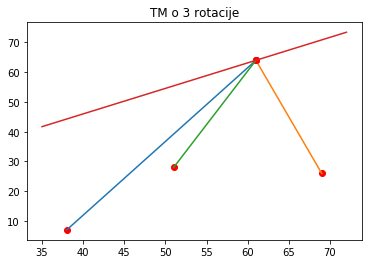

In [15]:
P=random_point()
A=random_point()
B=random_point()
C=random_point()
L1=(A,B,C)
for T in L1:
    P.connectpoints(T)
def tangens_zbroj(a,b):
    return (a+b)/(1-a*b)

theta=(A.y-P.y)/(A.x-P.x)
phi=(B.y-P.y)/(B.x-P.x)
psi=(C.y-P.y)/(C.x-P.x)
delta=tangens_zbroj(tangens_zbroj(theta,-phi),psi)
x1=np.linspace(min(P.x,A.x,B.x,C.x)-3,max(P.x,A.x,B.x,C.x)+3)
d=line(delta,P.y-delta*P.x)
plt.plot(x1,d(x1))
plt.title('TM o 3 rotacije')
plt.show()

## 2. AFINO PRESLIKAVANJE

**DEF:** $T:E^2 \to E^2$ afino preslikavanje $Tx=Ax+b, x \in E^2$ $x= \begin{pmatrix} x_1 \\ x_2\end{pmatrix}, b = \begin{pmatrix} b_1 \\ b_2\end{pmatrix}, A = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{pmatrix}.$ <br> Ako je T bijekcija, onda je inverz od T je afino preslikavanje. 

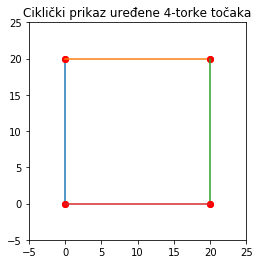

In [16]:
def afino(A,b):
    def f(P):
        return Point(A[0,0]*P.x+A[0,1]*P.y+b.x,A[1,0]*P.x+A[1,1]*P.y+b.y)
    return f
def poligon(l, ax=None, *args, **kwargs):
    if ax==None:
        fig=plt.figure()
        ax=fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    for i in range(1,len(l)):
        l[i].connectpoints(l[i-1],*args,**kwargs)
    l[0].connectpoints(l[len(l)-1],*args,**kwargs)
l=[Point(0,0),Point(0,20),Point(20,20),Point(20,0)]

poligon(l)
plt.xlim(-5,25)
plt.ylim(-5,25)
plt.title('Ciklički prikaz uređene 4-torke točaka')
plt.show()


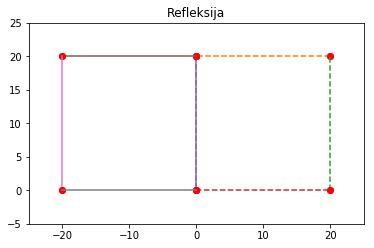

In [17]:
l1=[]
A1=np.array([[-1,0],[0,1]])
b=Point(0,0)
refl=afino(A1,b)
for T in l:
    l1.append(refl(T))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
poligon(l,ax,'--')
poligon(l1,ax)
plt.xlim(-25,25)
plt.ylim(-5,25)
plt.title('Refleksija')
plt.show()


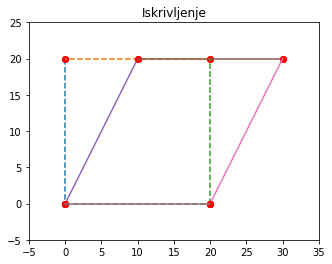

In [18]:
def Skewing(l):
    return np.array([[1,l],[0,1]])
A2=np.asmatrix(Skewing(0.5))
skew=afino(A2,b)
l2=[]
for T in l:
    l2.append(skew(T))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
poligon(l,ax,'--')
poligon(l2,ax)
plt.xlim(-5,35)
plt.ylim(-5,25)
plt.title('Iskrivljenje')
plt.show()

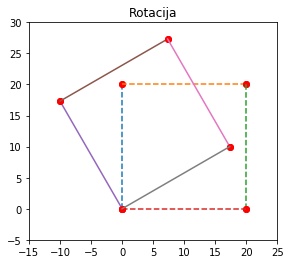

In [19]:
A3=np.asmatrix(R(np.pi/6))
rot=afino(A3,b)
l3=[]
for T in l:
    l3.append(rot(T))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
poligon(l,ax,'--')
poligon(l3,ax)
plt.xlim(-15,25)
plt.ylim(-5,30)
plt.title('Rotacija')
plt.show()


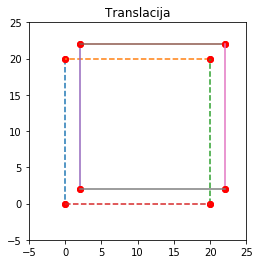

In [20]:
A4=np.asmatrix([[1,0],[0,1]])
b=Point(2,2)
trans=afino(A4,b)
l4=[]
for T in l:
    l4.append(trans(T))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
poligon(l,ax,'--')
poligon(l4,ax)
plt.xlim(-5,25)
plt.ylim(-5,25)
plt.title('Translacija')
plt.show()


[[ 0.8660254 -0.0669873]
 [ 0.5        1.1160254]]


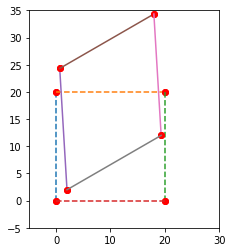

In [21]:
A5=A4*A3*A2
print(A5)
b=Point(2,2)
komp=afino(A5,b)
l5=[]
for T in l:
    l5.append(komp(T))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
poligon(l,ax,'--')
poligon(l5,ax)
plt.xlim(-5,30)
plt.ylim(-5,35)
plt.title('')
plt.show()

## 3. SFERNA RAVNINA


Prelazimo na trodimenzionalni euklidski prostor na kojem je definirana **udaljenost** kao $d(A,B)=||B-A||$, **skalarni produkt** $\langle x,y \rangle = x_1y_1+x_2y_2+x_3y_3 $ $x,y \in \mathbb{R}^3 .$ <br>
$x\times y = (x_2y_3-y_2x_3,-x_1y_3+y_1x_3,x_1y_2-y_1x_2)$ je **vektorski produkt**.


**DEF:** Ravnina u $E^3$ je jednoznačno određena smjerom i točkom.<br>
Ravnina $\Pi$ je skup točaka iz  $E^3$ sa svojstima
1. $\Pi \subseteq p$, gdje je p pravac
2. $\forall A,B \in \Pi$,$ AB \subseteq \Pi $
3. $\Pi \neq E^3$<br>
Ravnina zadana eksplicitna jednadžbom $\Pi(x,y)=ax+by+cz+d$ ,$x,y \in \mathbb{R}$, $a,b,c \in \mathbb{R}^3$ nekolinearni vektori, d konstantni vektor u  $\mathbb{R}^3.$ <br>$(a,b,c)$ je vektor normale.

**PROP:** Neka P,Q,R nekolinearne točke, tada $\exists!$ ravnina koja ih sadrži.<br>
Za dokaz egzistencije uzmemo samo $v:=Q-P$, $w:=R-P$.<br>
Znamo da je  $P+[u,w]$ ravnina koja sadrži te točke.

**DEF:** **Jedinična sfera** u $E^3$ je skup $S^2={x \in E^3 : ||x||=1}.$<br>
Točke su elementi,a pravci su presjeci sfere s ravnina kroz ishodište.<br>
**DEF:** Neka je $e$ jedinični vektor, $e \in E^3$, $||e||$. Skup $P={x \in S^2:{\langle e,x\rangle}=0 }$ zovemo pravcem s polom e.

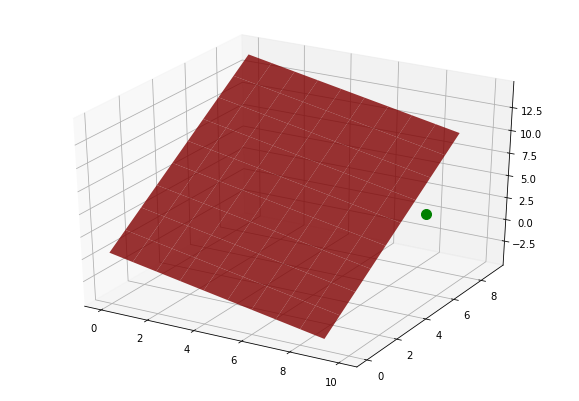

In [22]:
from mpl_toolkits.mplot3d import Axes3D
point  = np.array([1, 2, 3])
normal = np.array([1, -3, 2])
point2 = np.array([10, 5, 5])

#Odredimo d iz jednadžbe ravnine
d = -point.dot(normal)

xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure(figsize=(10,7)).gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.8,color='red')


#and i would like to plot this point : 
ax = plt.gca()
ax.scatter(point2[0] , point2[1] , point2[2],  color='green',s=100)
plt.show()

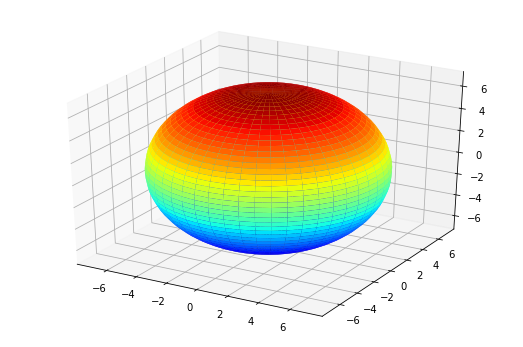

In [23]:
from matplotlib import cm
import imageio
def sfera(r=1):
    ph=np.linspace(0,2*np.pi)
    the=np.linspace(0,np.pi)
    x=np.array([r*np.cos(ph)*np.sin(the0) for the0 in the])
    y=np.array([r*np.sin(ph)*np.sin(the0) for the0 in the])
    z=np.array([[r*np.cos(the0) for i in range(len(ph))] for the0 in the])
    return x,y,z
s=sfera()
#my_col = cm.jet(*s/np.amax(*s))
ax = Axes3D(fig)
plt3d = plt.figure(figsize=(9,6)).gca(projection='3d')
plt3d.plot_surface(*sfera(7),rstride=1, linewidth=10,cstride=1,cmap=cm.jet,shade=True)
#surf = ax.plot_surface(*sfera(7), cmap=cm.jet, linewidth=0.1)
#plt3d.colorbar(surf, shrink=0.5, aspect=5)
fig = plt.figure()
plt.show()
images = []

# We are going to do 20 plots, for 20 different angles
#for angle in range(70,210,2):
 #   fig = plt.figure()
  #  ax = fig.gca(projection='3d')
   # ax.plot_surface(*s,)

    # Set the angle of the camera
    #ax.view_init(30,angle)

    # Save it
    #filename='sfera'+str(angle)+'.png'
    #plt.savefig(filename, dpi=96)
    #plt.gca()
    
    #plt.close(fig)
    
    #images.append(imageio.imread(filename))

#imageio.mimsave('sfera.gif', images)

In [24]:
?plt3d.plot_surface()